<a href="https://colab.research.google.com/github/hiepnguyen2000hn/AdminLTE/blob/master/Road_Traffic_Accidents_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%cd sample_data/mnist_test.csv

[Errno 2] No such file or directory: 'sample_data/Data/'
/content


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
rta = pd.read_csv("/content/sample_data/Data/RTA Dataset.csv")
rta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

# Pre-processing the data

In [ ]:
#finding and removing bad columns
bad_cols = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality']
not_clear_cols = ['Defect_of_vehicle', 'Service_year_of_vehicle', 'Type_of_vehicle', 'Educational_level', 'Owner_of_vehicle']
to_remove_cols = bad_cols + not_clear_cols

rta_afterDrop = rta.drop(columns=to_remove_cols)

#replacing not-null cells that contain 'unknown' values with the values above or below it
rta_normlize = rta_afterDrop.replace({'Driving_experience': {"unknown": "Unknown"}})
rta_noNAN = rta_normlize.fillna("Unknown")
rta_noNAN = rta_noNAN.replace("Unknown", method='ffill')

rta_fullVals = rta_noNAN.replace("Unknown", method='bfill')
rta_fullVals

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,1-2yr,Residential areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,1-2yr,Recreational areas,other,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Employee,5-10yr,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Employee,2-5yr,Industrial areas,other,Tangent road with flat terrain,Y Shape,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,2-5yr,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,31-50,Male,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
rta_fullVals.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

# Handling missing values


In [ ]:
#fill the null/missing values with most frequent value(mode) of the column
rta_afterDrop = rta_fullVals
rta_afterDrop = rta_afterDrop.fillna(rta_afterDrop.mode().iloc[0])

In [ ]:
rta_afterDrop.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:
rta_afterDrop

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,1-2yr,Residential areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,1-2yr,Recreational areas,other,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Employee,5-10yr,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Employee,2-5yr,Industrial areas,other,Tangent road with flat terrain,Y Shape,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,2-5yr,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,31-50,Male,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,...,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Converting Categorical Values

In [ ]:
#dividing the time through the day into 4 sections
def formatTimeCol(t):
    t = t[:2]
    if ":" in t:
        t = t[:1]

    return int(t)

def categorizeTimeCol(t):
    if t >= 0 and t < 6:
        return "Night"
    if t >= 6 and t < 12:
        return "Morning"
    if t >= 12 and t < 18:
        return "Afternoon"
    if t >= 18 and t < 24:
        return "Evening"


rta_afterDrop['Time'] = rta_afterDrop['Time'].apply(lambda x: formatTimeCol(x))
rta_afterDrop['Time'] = rta_afterDrop['Time'].apply(lambda x: categorizeTimeCol(x))

rta_afterDrop['Time'].value_counts(dropna=False)

Afternoon    5125
Evening      3280
Morning      3236
Night         675
Name: Time, dtype: int64

In [ ]:
#mapping categorical values to numeric values

rta_mapProcess = rta_afterDrop

rta_mapProcess['Sex_of_driver'] = rta_mapProcess['Sex_of_driver'].map({'Female': 0, 'Male': 1})
rta_mapProcess['Time'] = rta_mapProcess['Time'].map({'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3})
rta_mapProcess['Age_band_of_driver'] = rta_mapProcess['Age_band_of_driver'].map({'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3})
rta_mapProcess['Driving_experience'] = rta_mapProcess['Driving_experience'].map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5})
rta_mapProcess['Accident_severity'] = rta_mapProcess['Accident_severity'].map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})

mapped_cols = ['Driving_experience', 'Sex_of_driver', 'Age_band_of_driver', 'Time', 'Accident_severity']

rta_afterMap = rta_mapProcess

In [ ]:
rta_afterMap.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

Label Encoding

In [ ]:
columns = list(rta_afterMap.columns)
int_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
no_need_convert = int_cols + mapped_cols
test = pd.DataFrame(rta_afterMap, columns = ['Number_of_vehicles_involved', 'Number_of_casualties',
       'Driving_experience', 'Sex_of_driver', 'Age_band_of_driver', 'Time'])

columns_needed = list(set(columns) - set(no_need_convert))
print("Cols:", columns_needed)

#label encoding the rest of the categorical columns
for i in columns_needed:
  rta_afterMap[i] = rta_afterMap[i].astype('category')
  rta_afterMap[i] = rta_afterMap[i].cat.codes

rta_afterMap.head()
#creating dummy variables
#rta_cleanWdummies = pd.get_dummies(rta_afterMap, columns=columns_needed)

rta_cleanWdummies = rta_afterMap
#rta_cleanWdummies.drop(columns = 'Lanes_or_Median_N')
#test

Cols: ['Vehicle_movement', 'Day_of_week', 'Area_accident_occured', 'Type_of_collision', 'Lanes_or_Medians', 'Pedestrian_movement', 'Vehicle_driver_relation', 'Road_surface_conditions', 'Road_surface_type', 'Weather_conditions', 'Cause_of_accident', 'Light_conditions', 'Road_allignment', 'Types_of_Junction']


In [ ]:
rta_cleanWdummies.describe()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,...,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,1.893959,2.980513,1.590289,0.942189,0.350195,3.253410,6.415151,2.818366,4.930091,2.800341,...,0.718902,2.177493,2.297418,5.663608,2.040679,1.548149,2.822264,4.836067,6.881536,0.167181
std,0.858551,2.059712,0.830723,0.233395,0.753533,1.318968,2.381352,1.509711,0.902867,2.555690,...,1.276059,1.324187,0.858743,2.314447,0.688790,1.007179,1.941615,0.893611,5.077333,0.406082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.000000,2.000000,5.000000,1.000000,...,0.000000,0.000000,2.000000,6.000000,2.000000,1.000000,2.000000,5.000000,1.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000,0.000000,3.000000,7.000000,2.000000,5.000000,1.000000,...,0.000000,3.000000,2.000000,7.000000,2.000000,1.000000,2.000000,5.000000,9.000000,0.000000
75%,3.000000,5.000000,2.000000,1.000000,0.000000,4.000000,7.000000,4.000000,5.000000,6.000000,...,0.000000,3.000000,2.000000,7.000000,2.000000,2.000000,3.000000,5.000000,11.000000,0.000000
max,3.000000,6.000000,3.000000,1.000000,2.000000,5.000000,12.000000,5.000000,8.000000,6.000000,...,3.000000,3.000000,7.000000,8.000000,7.000000,8.000000,11.000000,8.000000,18.000000,2.000000


# Splitting the data into Train and Test sets

In [ ]:
X_rta = rta_cleanWdummies.drop(columns=['Accident_severity'])
y_rta = rta_cleanWdummies['Accident_severity']

#we do a 70/30 split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_rta, y_rta, test_size=0.30, random_state=7)

print(X_train.shape)
print(X_test.shape)

(8621, 20)
(3695, 20)


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 6 features
select_feature = SelectKBest(chi2, k=6).fit(X_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)
selected_features = select_feature.get_feature_names_out()
selected_features

Score list: [ 2.8047202   0.54307227  0.78212938  0.14144121  4.0076371   0.39691651
  3.77619696  5.60268205  0.1922831   1.27436038  1.44840743  0.25887422
 13.45472908  1.83860771  3.69957631 16.06153153 49.76371959  1.42487149
  1.02166072 12.41397138]
Feature list: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Vehicle_driver_relation', 'Driving_experience',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident'],
      dtype='object')


array(['Vehicle_driver_relation', 'Lanes_or_Medians', 'Light_conditions',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Cause_of_accident'], dtype=object)

In [ ]:
feat = pd.DataFrame(rta_cleanWdummies, columns = selected_features)
feat.head()

,Vehicle_driver_relation,Lanes_or_Medians,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident
0,0,4,3,2,2,9
1,0,4,3,2,2,16
2,0,5,3,2,2,0
3,0,5,0,2,2,1
4,0,5,0,2,2,16


In [ ]:
#output column labels
target_names = ['Slight Injury','Serious Injury','Fatal injury']

In [ ]:
#list of models to train
model_list = [('Decision Tree Classifier', DecisionTreeClassifier(random_state=0)),
          ('K-Nearest Neighbors', KNeighborsClassifier()),
          ('Random Forest', RandomForestClassifier(max_depth = 20,n_estimators=200)),
          ('Support Vector Machine Classifier', SVC())]

In [ ]:
#function to train the model and make predictions for the given model
def model_train_and_predict(name, model, X_train, y_train, X_test, y_test, target_names):

  model.fit(X_train,y_train)

  dt_y_pred = model.predict(X_test)

  print("Confusion Matrix for: ", str(model).split('(')[0])
  print(classification_report(y_test, dt_y_pred, target_names=target_names))

  accuracy = accuracy_score(y_test, dt_y_pred)
  precision = precision_score(y_test, dt_y_pred, average='weighted')
  recall = recall_score(y_test, dt_y_pred, average='weighted')
  f1score =  f1_score(y_test, dt_y_pred, average='weighted')

  print("Accuracy:", accuracy)
  return [accuracy, precision, recall, f1score]


In [ ]:
#function that calls the model_train_and_predict function for every model and store the metrics into a dataframe to make comparisions
def all_models(models, X_train, y_train, X_test, y_test, target_names = target_names):

  ret = []
  names = []

  for name, model in models:
    data = model_train_and_predict(name, model, X_train, y_train, X_test, y_test, target_names)
    ret.append(data)
    names.append(name)

  model_metrics = pd.DataFrame(ret, columns =['Accuracy', 'Precision', 'Recall', 'F1_Score'])
  model_metrics.insert(0,'Model Name',names)

  return model_metrics


KNN test

In [ ]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
dt_y_pred = model.predict(X_test)


In [ ]:
print(classification_report(y_test, dt_y_pred, target_names=target_names))


                precision    recall  f1-score   support

 Slight Injury       0.85      0.99      0.91      3137
Serious Injury       0.19      0.02      0.03       520
  Fatal injury       0.20      0.03      0.05        38

      accuracy                           0.84      3695
     macro avg       0.41      0.34      0.33      3695
  weighted avg       0.75      0.84      0.78      3695



In [ ]:
from tqdm import tqdm

100%|██████████| 14/14 [00:08<00:00,  1.66it/s]

Minimum error:- 0.1510148849797023 at K = 9


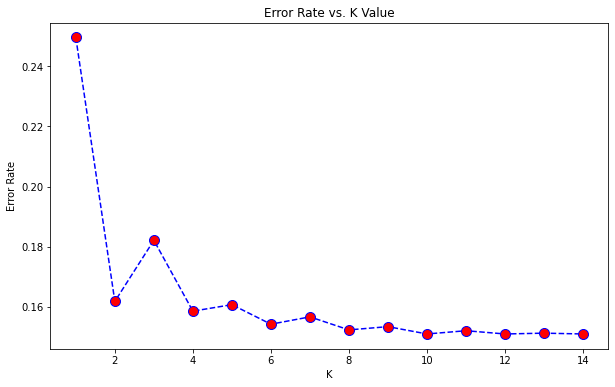

In [ ]:
error_rate = []
for i in tqdm(range(1,15)):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Running the models on raw data

In [ ]:
raw_model_metrics = all_models(model_list, X_train, y_train, X_test, y_test)

Confusion Matrix for:  DecisionTreeClassifier
                precision    recall  f1-score   support

 Slight Injury       0.87      0.83      0.85      3137
Serious Injury       0.21      0.25      0.23       520
  Fatal injury       0.13      0.21      0.16        38

      accuracy                           0.74      3695
     macro avg       0.40      0.43      0.41      3695
  weighted avg       0.77      0.74      0.76      3695

Accuracy: 0.7447902571041949
Confusion Matrix for:  KNeighborsClassifier
                precision    recall  f1-score   support

 Slight Injury       0.85      0.98      0.91      3137
Serious Injury       0.22      0.03      0.05       520
  Fatal injury       0.00      0.00      0.00        38

      accuracy                           0.84      3695
     macro avg       0.36      0.34      0.32      3695
  weighted avg       0.75      0.84      0.78      3695

Accuracy: 0.8392422192151556
Confusion Matrix for:  RandomForestClassifier
                

In [ ]:
raw_model_metrics

,Model Name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree Classifier,0.744790,0.767283,0.744790,0.755390
1,K-Nearest Neighbors,0.839242,0.752972,0.839242,0.781449
2,Random Forest,0.853857,0.842513,0.853857,0.794798
3,Support Vector Machine Classifier,0.848985,0.720776,0.848985,0.779645


# Sampling the data

Since there is an imbalance in the raw data, we try to use techniques such as Oversampling and Undersampling to possibly achieve better results


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

## Under-sampling (US)

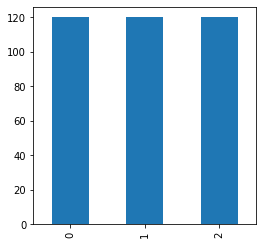

In [ ]:
undersample = NearMiss()

X_train_US, y_train_US = undersample.fit_resample(X_train, y_train)
y_train_US.value_counts(dropna=False).plot.bar(figsize=(4,4))

In [ ]:
models_with_undersampling = all_models(model_list, X_train_US, y_train_US, X_test, y_test)

Confusion Matrix for:  DecisionTreeClassifier
                precision    recall  f1-score   support

 Slight Injury       0.88      0.13      0.23      3137
Serious Injury       0.14      0.31      0.20       520
  Fatal injury       0.01      0.63      0.02        38

      accuracy                           0.16      3695
     macro avg       0.35      0.36      0.15      3695
  weighted avg       0.77      0.16      0.22      3695

Accuracy: 0.16075778078484437
Confusion Matrix for:  KNeighborsClassifier
                precision    recall  f1-score   support

 Slight Injury       0.84      0.30      0.45      3137
Serious Injury       0.13      0.38      0.20       520
  Fatal injury       0.01      0.39      0.03        38

      accuracy                           0.32      3695
     macro avg       0.33      0.36      0.22      3695
  weighted avg       0.74      0.32      0.41      3695

Accuracy: 0.3166441136671177
Confusion Matrix for:  RandomForestClassifier
               

In [ ]:
models_with_undersampling

,Model Name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree Classifier,0.160758,0.768861,0.160758,0.221029
1,K-Nearest Neighbors,0.316644,0.735879,0.316644,0.408191
2,Random Forest,0.118268,0.787687,0.118268,0.145732
3,Support Vector Machine Classifier,0.198647,0.753810,0.198647,0.285991


## Over-Sampling (OS)

In [ ]:

oversample = SMOTE()

X_train_OS, y_train_OS = oversample.fit_resample(X_train, y_train)
y_train_OS.value_counts(dropna=False).countplot(y_rta,label="Count")

ax = sns.countplot(y_rta,label="Count")
A, B, C = y_train_OS.value_counts()
print('Slight Injury: ', A)
print('Serious injury : ', B)
print('Fatal injury : ', C)

AttributeError: ignored

In [ ]:
models_with_oversampling = all_models(model_list, X_train_OS, y_train_OS, X_test, y_test)

Confusion Matrix for:  DecisionTreeClassifier
                precision    recall  f1-score   support

 Slight Injury       0.87      0.74      0.80      3137
Serious Injury       0.20      0.33      0.25       520
  Fatal injury       0.06      0.24      0.10        38

      accuracy                           0.68      3695
     macro avg       0.38      0.44      0.38      3695
  weighted avg       0.77      0.68      0.72      3695

Accuracy: 0.6798376184032476
Confusion Matrix for:  KNeighborsClassifier
                precision    recall  f1-score   support

 Slight Injury       0.86      0.55      0.67      3137
Serious Injury       0.15      0.38      0.21       520
  Fatal injury       0.02      0.18      0.04        38

      accuracy                           0.52      3695
     macro avg       0.34      0.37      0.31      3695
  weighted avg       0.75      0.52      0.60      3695

Accuracy: 0.5231393775372124
Confusion Matrix for:  RandomForestClassifier
                

In [ ]:
models_with_oversampling

,Model Name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree Classifier,0.679838,0.767370,0.679838,0.716494
1,K-Nearest Neighbors,0.523139,0.748123,0.523139,0.599543
2,Random Forest,0.787280,0.787269,0.787280,0.787272
3,Support Vector Machine Classifier,0.614344,0.760621,0.614344,0.672117


Data Visualization

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

Slight Injury:  10415
Serious injury :  1743
Fatal injury :  158


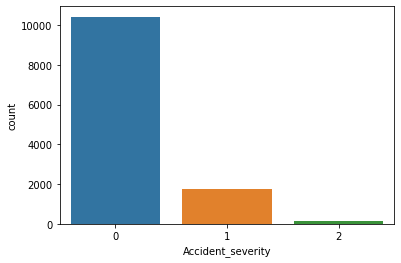

In [ ]:
ax = sns.countplot(y_rta,label="Count")
A, B, C = y_rta.value_counts()
print('Slight Injury: ', A)
print('Serious injury : ', B)
print('Fatal injury : ', C)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

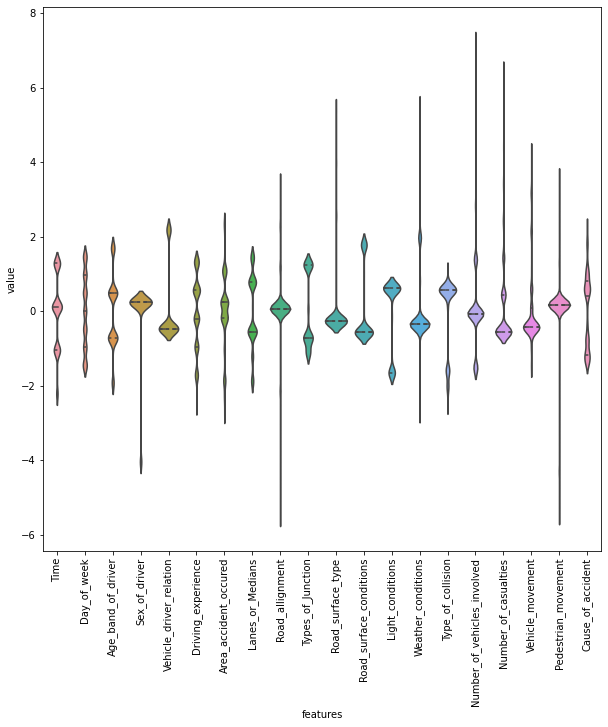

In [ ]:
data_dia = y_rta
data = X_rta
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_rta,data_n_2.iloc[:,0:20]],axis=1)
data = pd.melt(data,id_vars="Accident_severity",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

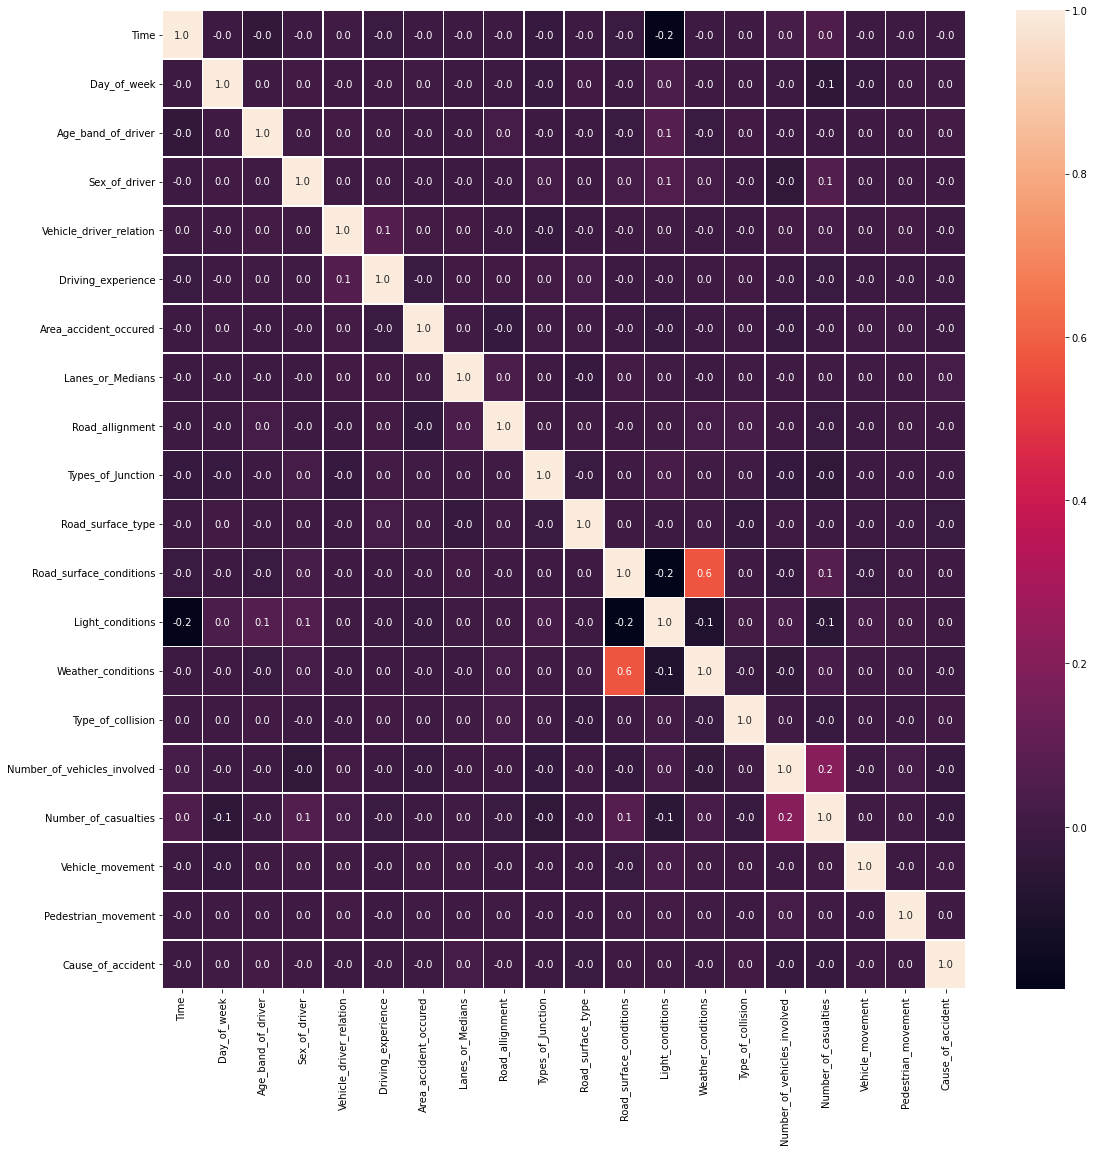

In [ ]:
#correlation map
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_rta.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Cross-Validation

RF
                precision    recall  f1-score   support

 Slight Injury       0.86      0.34      0.48      3137
Serious Injury       0.14      0.40      0.21       520
  Fatal injury       0.02      0.45      0.03        38

      accuracy                           0.35      3695
     macro avg       0.34      0.39      0.24      3695
  weighted avg       0.75      0.35      0.44      3695



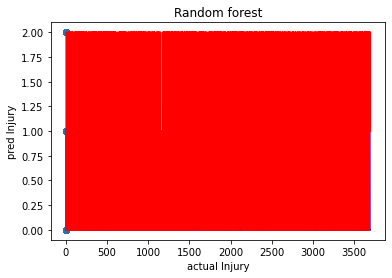

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,model
0,0.004425,0.009621,0.611111,0.724537,0.611111,0.620491,RF
1,0.004206,0.009135,0.555556,0.583333,0.555556,0.505556,RF
2,0.004032,0.009311,0.555556,0.538889,0.555556,0.531300,RF
3,0.003914,0.009144,0.666667,0.739899,0.666667,0.667593,RF
4,0.003975,0.008502,0.444444,0.698006,0.444444,0.432858,RF
5,0.006077,0.009519,0.500000,0.574074,0.500000,0.458853,RF
6,0.004127,0.009189,0.333333,0.300926,0.333333,0.284043,RF
7,0.004028,0.009669,0.666667,0.668254,0.666667,0.664724,RF
8,0.004284,0.009013,0.500000,0.597222,0.500000,0.482621,RF
9,0.004049,0.009325,0.500000,0.634615,0.500000,0.462963,RF


In [ ]:
from sklearn import model_selection
dfs = []
name = 'RF'
results = []
names = []

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

target_names = ['Slight Injury','Serious Injury','Fatal injury']

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=90210)

cv_results = model_selection.cross_validate( KNeighborsClassifier(n_neighbors=9), X_train, y_train, cv=kfold, scoring=scoring)

clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(name)
print(classification_report(y_test, y_pred, target_names=target_names))
#print(confusion_matrix(y_test, y_pred, labels=target_names))

# visual predicted prices
plt.plot(list(y_test), color='blue', label='Actual Injury')
plt.plot(y_pred, color='red', label='Pred Injury')
plt.scatter(y_test, y_pred)
plt.xlabel('actual Injury')
plt.ylabel('pred Injury')
plt.title("Random forest")
plt.show()

results.append(cv_results)
names.append(name)
this_df = pd.DataFrame(cv_results)
this_df['model'] = name
dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)


final

Hyper-Paramter Tuning for Random Forest / Sensitivity Analysis

In [ ]:
for i in range(20):
  print('Results for max_depth = ', i+1)
  rf = model_train_and_predict(name,RandomForestClassifier(max_depth = i+1 ,n_estimators=200), X_train, y_train, X_test, y_test, target_names)

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Random Search CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 911}

Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15],
    'max_features': [5, 10, 15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
rf_GridCV = model_train_and_predict(name, RandomForestClassifier(bootstrap = True, max_depth = 10 ,max_features = 15, min_samples_leaf = 3, min_samples_split = 8, n_estimators=200), X_train, y_train, X_test, y_test, target_names)

Confusion Matrix for:  RandomForestClassifier
                precision    recall  f1-score   support

 Slight Injury       0.85      1.00      0.92      3137
Serious Injury       0.71      0.05      0.09       520
  Fatal injury       0.33      0.05      0.09        38

      accuracy                           0.85      3695
     macro avg       0.63      0.36      0.37      3695
  weighted avg       0.83      0.85      0.79      3695



Selected Features Analysis - ['Vehicle_driver_relation', 'Lanes_or_Medians', 'Light_conditions',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Cause_of_accident']

Accuracy is:  0.8373477672530446


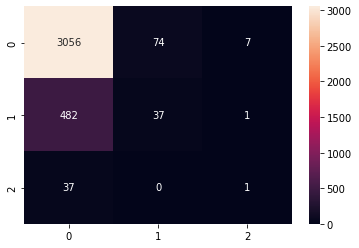

In [ ]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(max_depth = 20,n_estimators=200)
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Feature Importance

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [ ]:
model = RandomForestClassifier(max_depth = 20,n_estimators=200)
model.fit(X_train,y_train)
dt_y_pred = model.predict(X_test)

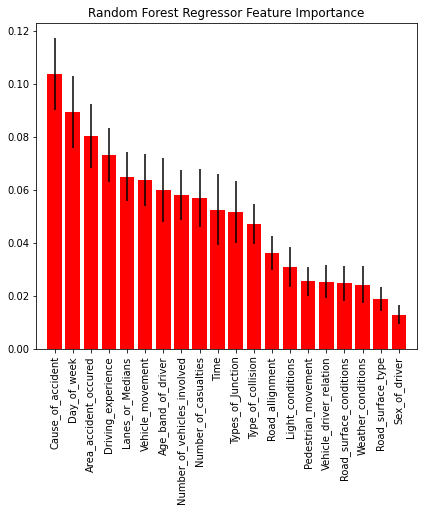

In [ ]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(model, feature_names=X_rta.columns,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90,
                                         ax=ax1);